## Exploring a dataset with Python:

In [1]:
##IMPORTING LIBRARIES
import pandas as pd
import statistics as stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# IMPORTING THE 50 STARTUPS DATASET
dataset = pd.read_csv('50_Startups.csv')

In [3]:
# Look at the top of the dataset:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
# Find some summary statistics:
dataset.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [5]:
# Finding specific statistics such as the mean:
mean_adm = dataset['Administration'].mean()
print(round(mean_adm, 2))

121344.64


In [6]:
# And the median:
median = dataset['Administration'].median()
print(median)

122699.795


In [7]:
# (Finding the mode...? Not appropriate here)
# mode = dataset['Administration'].mode()
# print(mode)

[Text(0, 0.5, 'Companies'),
 Text(0.5, 0, 'Adm Spent'),
 Text(0.5, 1.0, 'Administration Histogram')]

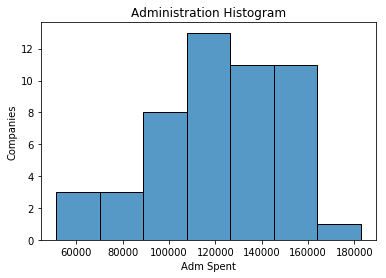

In [8]:
# Producing a histogram:
ax = sns.histplot(dataset.Administration)
ax.set(xlabel='Adm Spent',
       ylabel='Companies',
       title ='Administration Histogram')

[Text(0, 0.5, 'Companies'),
 Text(0.5, 0, 'Adm spent'),
 Text(0.5, 1.0, 'Administration Histogram')]

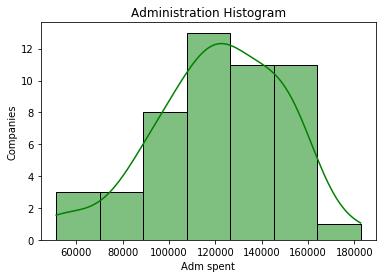

In [9]:
# Changing some of the aesthetics... adding in a kernel desnity estimate:
ax = sns.histplot(dataset.Administration, kde=True, color ='green')
ax.set(xlabel='Adm spent',
       ylabel='Companies',
       title ='Administration Histogram')

Text(0.5, 1.0, 'Box plot Administration')

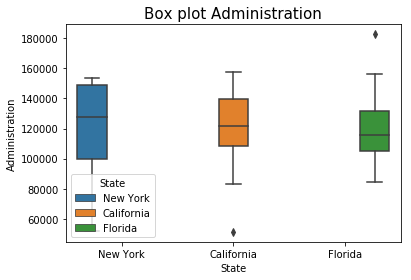

In [11]:
# Creating a boxplot by group:
sns.boxplot(x = 'State', y ='Administration',
            data=dataset, hue = 'State')
plt.title('Box plot Administration',
          fontsize=15)

# Note how much more useful this is than:
# sns.boxplot(y ='Administration',
#             data=dataset, hue = 'State')
# plt.title('Box plot Administration',
#           fontsize=15)


In [12]:
# Finding some statistics by a grouping categorical variable:
data_locations = dataset.groupby('State', axis = 0).median()
data_locations

,R&D Spend,Administration,Marketing Spend,Profit
State,,,,
California,63408.860,121597.550,174999.30,97427.84
Florida,74661.715,115728.745,253176.18,109543.12
New York,77044.010,127382.300,205517.64,108552.04


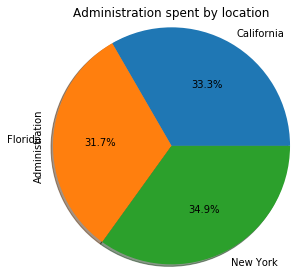

In [13]:
# Not great, but included for completeness!
data_locations['Administration'].plot(kind='pie',
                                      radius=1.2,
                                      autopct='%1.1f%%',
                                      shadow = True)

plt.title('Administration spent by location')
plt.tight_layout()

In [14]:
# Tidying up the appearance of the table:
data_locations.reset_index(inplace=True)
# Renaming columns:
data_locations.columns = ['State', 'R&D Spend', 'Administration', 'Marketing Spend', 'Profit']
data_locations

,State,R&D Spend,Administration,Marketing Spend,Profit
0,California,63408.860,121597.550,174999.30,97427.84
1,Florida,74661.715,115728.745,253176.18,109543.12
2,New York,77044.010,127382.300,205517.64,108552.04


In [15]:
# Making a new categorical variable from the profit:
dataset["Profit.rating"] = pd.cut(x = dataset["Profit"],
                bins=[0, 5e4, 1e5, 15e4, 2e5],
                labels=['Poor', 'Average', 'Very Good', 'Excellent'])
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit,Profit.rating
0,165349.20,136897.80,471784.10,New York,192261.83,Excellent
1,162597.70,151377.59,443898.53,California,191792.06,Excellent
2,153441.51,101145.55,407934.54,Florida,191050.39,Excellent
3,144372.41,118671.85,383199.62,New York,182901.99,Excellent
4,142107.34,91391.77,366168.42,Florida,166187.94,Excellent


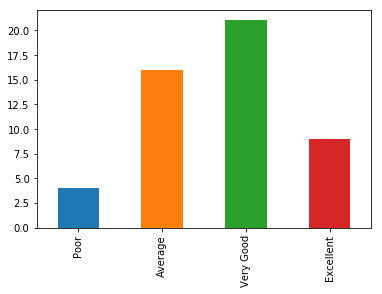

In [16]:
# Finally, producing a barplot of this:
dataset["Profit.rating"].value_counts()[['Poor', 'Average', 'Very Good', 'Excellent']].plot(kind = 'bar')

# (There are definitely neater ways to do this, which you should try out!)

## Tasks:
1. Experiment with the code above - try to figure out what each part does. Make changes and see if you were right.
2. Try to find a function to calculate the 10th percentile of each variable. What is the 10th percentile of R&D Spend?
3. What other plots can you produce?
    - Can you make a boxplot of the marketing spend?
    - Can you make a scatterplot of two variables? Can you colour the dots by state?
4. Can you calculate the coefficient of variation for each variable? Which is most dispersed? Which is least dispersed? Is it necessary to find the CV here?
5. Try to find some more appropriate data and see if you can make a line graph or a time series. Why is such a graph not appropriate here?
6. Find other interesting datasets and practise reading them in, finding descriptive statistics, and producing appropriate plots.